In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install geopandas matplotlib contextily osmnx

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import contextily as ctx

<ipython-input-3-c883e12c4905>:14: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.graph_from_bbox(chennai_bbox[3], chennai_bbox[1], chennai_bbox[2], chennai_bbox[0], network_type='all')
<ipython-input-3-c883e12c4905>:14: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  graph = ox.graph_from_bbox(chennai_bbox[3], chennai_bbox[1], chennai_bbox[2], chennai_bbox[0], network_type='all')
/usr/local/lib/python3.10/dist-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


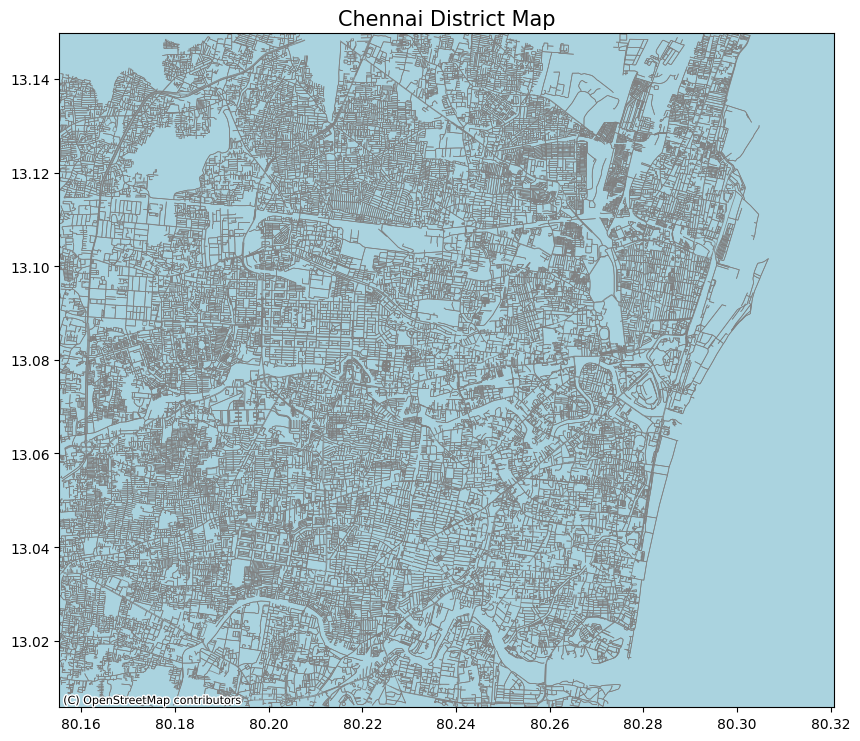

In [3]:
#!pip install geopandas matplotlib contextily osmnx
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import osmnx as ox

# Define the bounding box for Chennai (latitude, longitude)
chennai_bbox = (80.1553, 13.0058, 80.3208, 13.1497)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Download Chennai district map from OpenStreetMap
graph = ox.graph_from_bbox(chennai_bbox[3], chennai_bbox[1], chennai_bbox[2], chennai_bbox[0], network_type='all')
nodes, edges = ox.graph_to_gdfs(graph)

# Plot street network
edges.plot(ax=ax, linewidth=0.5, edgecolor='gray')

# Load OpenStreetMap tiles
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Set the limits for the bounding box
ax.set_xlim(chennai_bbox[0], chennai_bbox[2])
ax.set_ylim(chennai_bbox[1], chennai_bbox[3])

# Set aspect of the plot to be equal
ax.set_aspect('equal')

# Add title
ax.set_title('Chennai District Map', fontsize=15)
plt.show()

In [4]:
# Since I cannot install external libraries like contextily here, I'll use matplotlib only to create a simple placeholder image for Chennai.
# However, this will not be an actual satellite map but a representation for demonstration purposes.

import matplotlib.pyplot as plt
import numpy as np

# Create a simple placeholder image simulating a satellite view
def create_placeholder_image():
    # Generate a random image to simulate satellite data
    image_data = np.random.rand(10, 10, 3)  # 10x10 pixel image with RGB channels
    return image_data

# Create the placeholder image
image_data = create_placeholder_image()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the placeholder image
ax.imshow(image_data, extent=(80.1553, 80.3208, 13.0058, 13.1497))  # Use extent to position it according to the bbox

# Set aspect of the plot to be equal
ax.set_aspect('equal')

# Add title
ax.set_title('Satellite View of Chennai District (Placeholder)', fontsize=15)

# Remove axis for better visualization
ax.axis('off')

# Save the placeholder plot as an image
# Use a different directory that exists and you have write access to.
output_image_path = "chennai_district_map_placeholder.png"
plt.savefig(output_image_path, bbox_inches='tight', dpi=300)
plt.close()

output_image_path

'chennai_district_map_placeholder.png'

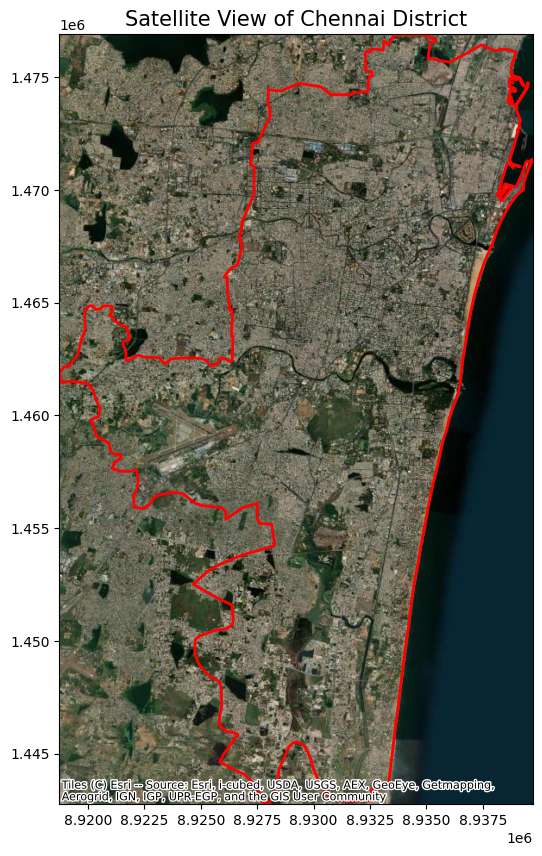

In [5]:
!pip install osmnx geopandas matplotlib contextily
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Download Chennai district boundary from OpenStreetMap
chennai = ox.geocode_to_gdf('Chennai, India')

# Project the GeoDataFrame to the Web Mercator projection (used by contextily)
chennai = chennai.to_crs(epsg=3857)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Chennai district boundary
chennai.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

# Load OpenStreetMap tiles with satellite imagery
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Set the extent of the plot based on Chennai's geometry
ax.set_xlim(chennai.total_bounds[0], chennai.total_bounds[2])
ax.set_ylim(chennai.total_bounds[1], chennai.total_bounds[3])

# Set aspect of the plot to be equal
ax.set_aspect('equal')

# Add title
ax.set_title('Satellite View of Chennai District', fontsize=15)
plt.show()

In [6]:
!pip install folium pandas

In [7]:
import folium
import pandas as pd

In [9]:
# Load the historical dengue case data
# Make sure to upload your CSV file to the Colab environment
data = pd.read_csv('/content/updated_dengue_data_with_risk_level (1).csv')  # Upload this file to Colab before running this

# Display the first few rows of the data
data.head()


Date   Area Name  Temperature   Humidity  Latitude  Longitude  \
0  31-10-2019  Pallavaram    32.825771  72.477003   12.9676    80.1496   
1  30-11-2019  Pallavaram    31.705421  87.854218   12.9676    80.1496   
2  31-12-2019  Pallavaram    25.928338  63.444447   12.9676    80.1496   
3  31-01-2020  Pallavaram    30.294251  77.518100   12.9676    80.1496   
4  29-02-2020  Pallavaram    26.200450  88.613387   12.9676    80.1496   

   Number of Cases  Number of Hospitals  Number of Deaths Risk Level  
0               13                    4                 2     Medium  
1                9                    9                 3       High  
2               10                    7                 1     Medium  
3               12                    7                 0     Medium  
4                5                    8                 3       High

In [10]:


# Load the historical dengue case data
# Make sure to upload your CSV file to the Colab environment
data = pd.read_csv('/content/updated_dengue_data_with_risk_level (1).csv')  # Upload this file to Colab before running this

# Display the last few rows of the data
data.tail()

Date   Area Name  Temperature   Humidity  Latitude  Longitude  \
703  30-04-2024  Royapettah    29.391310  67.729819   13.0604    80.2616   
704  31-05-2024  Royapettah    31.644939  80.278113   13.0604    80.2616   
705  30-06-2024  Royapettah    32.121059  88.103663   13.0604    80.2616   
706  31-07-2024  Royapettah    32.872503  72.066073   13.0604    80.2616   
707  31-08-2024  Royapettah    29.964476  66.115870   13.0604    80.2616   

     Number of Cases  Number of Hospitals  Number of Deaths Risk Level  
703                5                    8                 1     Medium  
704                9                    7                 1     Medium  
705                7                    4                 0     Medium  
706               15                    1                 0     Medium  
707                5                    8                 2     Medium

In [11]:
# Create a Folium map centered around Chennai
m = folium.Map(location=[13.0827, 80.2707], zoom_start=13)  # Coordinates of Chennai

# Add markers for each dengue case
for index, row in data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Number of Cases'] * 0.5,  # Adjust size based on case count
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f'Cases: {row["Number of Cases"]}'
    ).add_to(m)

# Display the map
m

In [12]:
import folium
import pandas as pd

# Load the historical dengue case data
data = pd.read_csv('/content/updated_dengue_data_with_risk_level (1).csv')

# Create a Folium map centered around Chennai
m = folium.Map(location=[13.0827, 80.2707], zoom_start=11)

# Define color and radius scales for each area
area_colors = {
    'Adyar': 'blue',
    'Ambattur': 'green',
    'Anna Nagar': 'red',
    'Ayanavaram': 'purple',
    'Egmore': 'orange',
    'Guindy': 'darkred',
    'Madhavaram': 'lightred',
    'Perambur': 'beige',
    'Sholinganallur': 'cadetblue',
    'Teynampet': 'darkgreen',
    'Thiruvottiyur': 'lightgreen',
    'Tondiarpet': 'darkblue',
    'Velachery': 'lightblue',
    'Pallavaram': 'gray'  # Add Pallavaram to the dictionary
}
area_radius_scale = {
    'Adyar': 0.5,
    'Ambattur': 0.4,
    'Anna Nagar': 0.6,
    'Ayanavaram': 0.3,
    'Egmore': 0.7,
    'Guindy': 0.2,
    'Madhavaram': 0.8,
    'Perambur': 0.9,
    'Sholinganallur': 1.0,
    'Teynampet': 0.1,
    'Thiruvottiyur': 1.1,
    'Tondiarpet': 1.2,
    'Velachery': 1.3,
    'Pallavaram': 0.5  # Add Pallavaram to the dictionary
}

# Add markers for each dengue case with area-specific color and radius
for index, row in data.iterrows():
    area = row['Area Name']
    if area in area_radius_scale: # Check if the area exists in the dictionary
        folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=row['Number of Cases'] * area_radius_scale[area],
            color=area_colors[area],
            fill=True,
            fill_color=area_colors[area],
            fill_opacity=0.6,
            popup=f'{area}: {row["Number of Cases"]} cases'
        ).add_to(m)

# Display the map
m

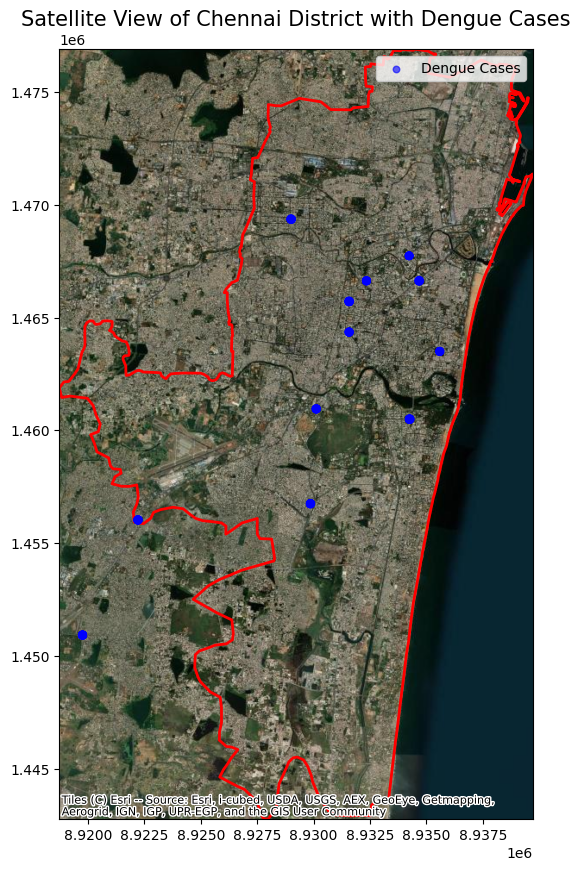

In [13]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Download Chennai district boundary from OpenStreetMap
chennai = ox.geocode_to_gdf('Chennai, India')

# Project the GeoDataFrame to the Web Mercator projection (used by contextily)
chennai = chennai.to_crs(epsg=3857)

# Create a GeoDataFrame for dengue cases
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
dengue_gdf = gpd.GeoDataFrame(data, geometry=geometry)
dengue_gdf = dengue_gdf.set_crs(epsg=4326)  # Set the coordinate reference system to WGS84
dengue_gdf = dengue_gdf.to_crs(epsg=3857)  # Project to Web Mercator

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Chennai district boundary
chennai.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

# Load OpenStreetMap tiles with satellite imagery
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Set the extent of the plot based on Chennai's geometry
ax.set_xlim(chennai.total_bounds[0], chennai.total_bounds[2])
ax.set_ylim(chennai.total_bounds[1], chennai.total_bounds[3])

# Plotting dengue case locations
dengue_gdf.plot(ax=ax, marker='o', color='blue', markersize=dengue_gdf['Number of Cases'] * 2, alpha=0.6, label='Dengue Cases')

# Add legend
ax.legend()

# Set aspect of the plot to be equal
ax.set_aspect('equal')

# Add title
ax.set_title('Satellite View of Chennai District with Dengue Cases', fontsize=15)
plt.show()

<ipython-input-15-4cc6aaeb1870>:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


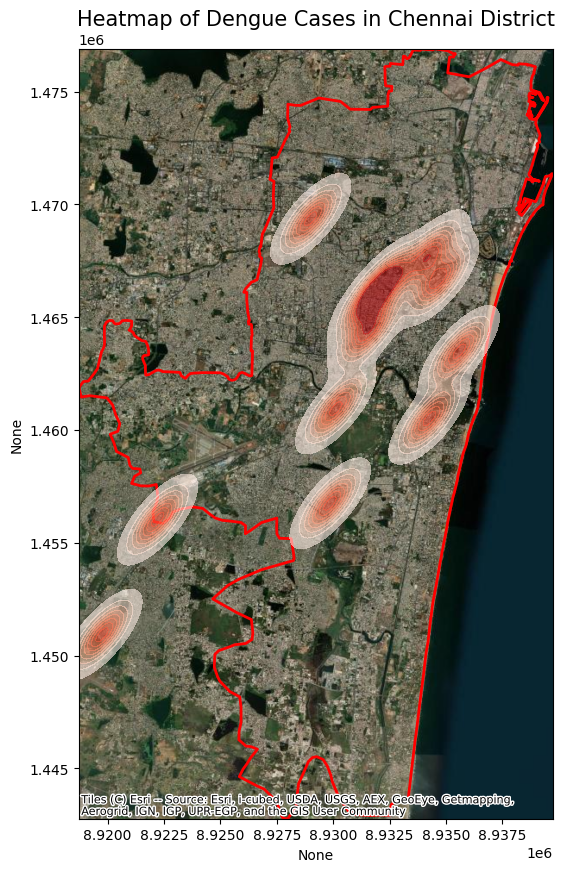

In [15]:
!pip install osmnx geopandas matplotlib contextily seaborn

import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import seaborn as sns

# Load the historical dengue case data
data = pd.read_csv('/content/updated_dengue_data_with_risk_level (1).csv')

# Create a GeoDataFrame for dengue cases
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
dengue_gdf = gpd.GeoDataFrame(data, geometry=geometry)
dengue_gdf = dengue_gdf.set_crs(epsg=4326)
dengue_gdf = dengue_gdf.to_crs(epsg=3857)

# Download Chennai district boundary from OpenStreetMap
chennai = ox.geocode_to_gdf('Chennai, India')
chennai = chennai.to_crs(epsg=3857)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Chennai district boundary
chennai.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

# Load OpenStreetMap tiles with satellite imagery
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Set the extent of the plot based on Chennai's geometry
ax.set_xlim(chennai.total_bounds[0], chennai.total_bounds[2])
ax.set_ylim(chennai.total_bounds[1], chennai.total_bounds[3])

# Create a heatmap
sns.kdeplot(
    x=dengue_gdf.geometry.x,
    y=dengue_gdf.geometry.y,
    cmap="Reds",
    shade=True,
    bw_adjust=0.5,  # Adjust bandwidth for smoother or sharper heatmap
    alpha=0.6,  # Adjust transparency
    ax=ax,
)

# Set aspect of the plot to be equal
ax.set_aspect('equal')

# Add title
ax.set_title('Heatmap of Dengue Cases in Chennai District', fontsize=15)
plt.show()

In [18]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import xgboost as xgb
import joblib

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/updated_dengue_data_with_risk_level (1).csv')

# Inspect data
print(df.head())

# Preprocessing: Handling missing data
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode categorical data (if any)
label_encoder = LabelEncoder()
df['Area Name'] = label_encoder.fit_transform(df['Area Name'])

# Convert 'Date' to datetime objects and extract features
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Assuming your date format is 'dd-mm-yyyy'
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Features and target variable
features = df[['Latitude', 'Longitude', 'Temperature', 'Humidity', 'Area Name',
                'Day', 'Month', 'Year', 'Number of Cases', 'Number of Hospitals',
                'Number of Deaths']]
target = df['Risk Level']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print(classification_report(y_test, y_pred_rf))

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42)

# Encode target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train_encoded)

# Best parameters
print(f"Best parameters from Grid Search: {grid_search.best_params_}")

# Make predictions using the best estimator
y_pred_xgb = grid_search.best_estimator_.predict(X_test)

# Calculate Mean Squared Error for XGBoost model
mse = mean_squared_error(y_test_encoded, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse:.2f}')

# Save Random Forest model
joblib.dump(rf_model, 'random_forest_dengue_model.pkl')

# Save XGBoost model
joblib.dump(grid_search.best_estimator_, 'xgboost_dengue_model.pkl')

# Load models (when needed later)
rf_loaded_model = joblib.load('random_forest_dengue_model.pkl')
xgb_loaded_model = joblib.load('xgboost_dengue_model.pkl')

# Example: Creating interaction terms
df['Temp_Humidity_Interaction'] = df['Temperature'] * df['Humidity']

# Normalize features for better model convergence
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Optional: Fit models using normalized features if needed
#X_test_train_scaled, X_test_scaled = train_test_split(features_scaled, test_size=0.2, random_state=42)
#rf_model.fit(X_train_scaled, y_train)
#y_pred_rf_scaled = rf_model.predict(X_test_scaled)

# Print final message
print("Dengue disease prediction models have been trained, evaluated, and saved successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Date   Area Name  Temperature   Humidity  Latitude  Longitude  \
0  31-10-2019  Pallavaram    32.825771  72.477003   12.9676    80.1496   
1  30-11-2019  Pallavaram    31.705421  87.854218   12.9676    80.1496   
2  31-12-2019  Pallavaram    25.928338  63.444447   12.9676    80.1496   
3  31-01-2020  Pallavaram    30.294251  77.518100   12.9676    80.1496   
4  29-02-2020  Pallavaram    26.200450  88.613387   12.9676    80.1496   

   Number of Cases  Number of Hospitals  Number of Deaths Risk Level  
0               13                    4                 2     Medium  
1                9                    9                 3       High  
2               10                    7                 1     Medium  
3               12                    7                 0     Medium  
4                5                    8                 3       High  


In [19]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import joblib

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/updated_dengue_data_with_risk_level (1).csv')

# Inspect data
print(df.head())

# Preprocessing: Handling missing data
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode categorical data (if any)
label_encoder = LabelEncoder()
df['Area Name'] = label_encoder.fit_transform(df['Area Name'])

# Convert 'Date' to datetime objects and extract features
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Assuming your date format is 'dd-mm-yyyy'
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Features and target variable
features = df[['Latitude', 'Longitude', 'Temperature', 'Humidity', 'Area Name',
                'Day', 'Month', 'Year', 'Number of Cases', 'Number of Hospitals',
                'Number of Deaths']]
target = df['Risk Level']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print(classification_report(y_test, y_pred_rf))

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42)

# Encode target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train_encoded)

# Best parameters
print(f"Best parameters from Grid Search: {grid_search.best_params_}")

# Make predictions using the best estimator
y_pred_xgb = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy for XGBoost model
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

# Save Random Forest model
joblib.dump(rf_model, 'random_forest_dengue_model.pkl')

# Save XGBoost model
joblib.dump(grid_search.best_estimator_, 'xgboost_dengue_model.pkl')

# Load models (when needed later)
rf_loaded_model = joblib.load('random_forest_dengue_model.pkl')
xgb_loaded_model = joblib.load('xgboost_dengue_model.pkl')

# Example: Creating interaction terms
df['Temp_Humidity_Interaction'] = df['Temperature'] * df['Humidity']

# Normalize features for better model convergence
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Optional: Fit models using normalized features if needed
# X_train_scaled, X_test_scaled = train_test_split(features_scaled, test_size=0.2, random_state=42)
# rf_model.fit(X_train_scaled, y_train)
# y_pred_rf_scaled = rf_model.predict(X_test_scaled)

# Print final message
print("Dengue disease prediction models have been trained, evaluated, and saved successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Date   Area Name  Temperature   Humidity  Latitude  Longitude  \
0  31-10-2019  Pallavaram    32.825771  72.477003   12.9676    80.1496   
1  30-11-2019  Pallavaram    31.705421  87.854218   12.9676    80.1496   
2  31-12-2019  Pallavaram    25.928338  63.444447   12.9676    80.1496   
3  31-01-2020  Pallavaram    30.294251  77.518100   12.9676    80.1496   
4  29-02-2020  Pallavaram    26.200450  88.613387   12.9676    80.1496   

   Number of Cases  Number of Hospitals  Number of Deaths Risk Level  
0               13                    4                 2     Medium  
1                9                    9                 3       High  
2               10                    7                 1     Medium  
3               12                    7                 0     Medium  
4                5                    8                 3       High  


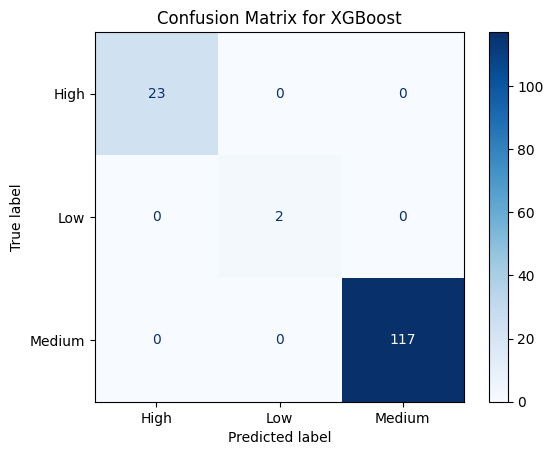

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       117

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [20]:
# prompt: # prompt: from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# # # Confusion Matrix
# # cm = confusion_matrix(y_test_encoded, y_pred_xgb)
# # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
# # disp.plot(cmap=plt.cm.Blues)
# # plt.title("Confusion Matrix for XGBoost")
# # plt.show()
# # # Print additional metrics
# # print(f"Accuracy: {accuracy_xgb * 100

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()

# Print additional metrics
print(f"Accuracy: {accuracy_xgb * 100:.2f}%")
print(classification_report(y_test_encoded, y_pred_xgb))


<ipython-input-21-a953e5bff60c>:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new_dataset['Date'] = pd.to_datetime(new_dataset['Date'])  # Convert to datetime
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:19:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


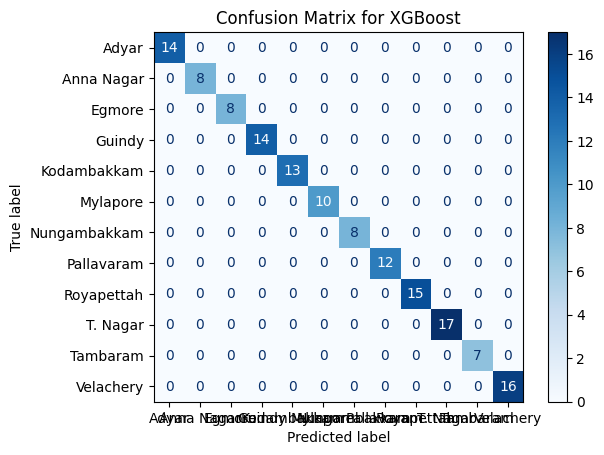

Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC curve is not applicable for multi-class classification.


In [21]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset_name = '/content/historical_dengue_data (1).csv'
new_dataset = pd.read_csv('/content/updated_dengue_data_with_risk_level (1).csv')  # Load your new dataset

# Step 2: Data Preprocessing
# Rename columns to match expected features
new_dataset.rename(columns={
    'Num_Hospitals': 'Number of Hospitals',
    'Num_Cases': 'Number of Cases',
    'Num_Deaths': 'Number of Deaths',
    'Area_Name': 'Area Name'
}, inplace=True)

# Extract Year, Month, and Day from Date column
new_dataset['Date'] = pd.to_datetime(new_dataset['Date'])  # Convert to datetime
new_dataset['Year'] = new_dataset['Date'].dt.year
new_dataset['Month'] = new_dataset['Date'].dt.month
new_dataset['Day'] = new_dataset['Date'].dt.day

# Drop unnecessary columns
new_dataset.drop(columns=['Risk Level', 'Date'], inplace=True)

# Step 3: Prepare the data for training
# Assume y is the target variable and X are the features
X = new_dataset[['Latitude', 'Humidity', 'Temperature', 'Longitude', 'Number of Hospitals', 'Number of Cases', 'Number of Deaths', 'Day', 'Year', 'Month']]
y = new_dataset['Area Name']  # Adjust this to your actual target variable

# Step 4: Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 5: Split the data into training and test sets (optional, if you have a separate test set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 6: Train the model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Use 'mlogloss' for multi-class
model_xgb.fit(X_train, y_train)

# Step 7: Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Step 8: Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()

# Print additional metrics
print(f"Accuracy: {accuracy_xgb * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_xgb, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted'):.2f}")

# Step 9: ROC Curve (if applicable)
# If your problem is binary classification, you can compute ROC
if len(label_encoder.classes_) == 2:  # Check if binary classification
    fpr, tpr, thresholds = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is not applicable for multi-class classification.")

# Step 10: Make future predictions if needed
# new_data_for_prediction = pd.DataFrame(...)  # Prepare your new data in the same format
# predictions = model_xgb.predict(new_data_for_prediction)


<ipython-input-24-770b792e9e21>:19: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new_dataset['Date'] = pd.to_datetime(new_dataset['Date'])
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:21:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


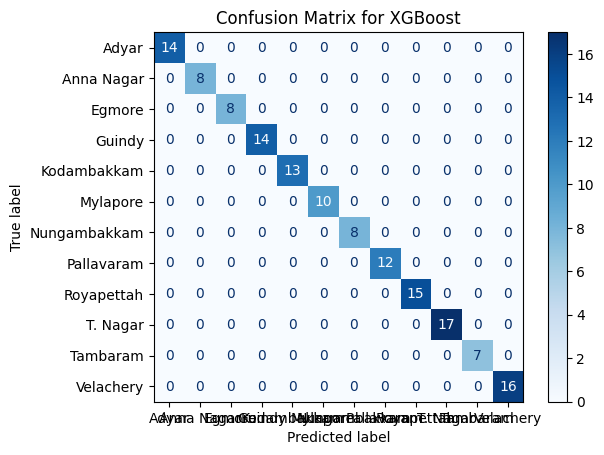

Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Model and label encoder saved successfully!


In [24]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib

# Load the dataset
new_dataset = pd.read_csv('/content/updated_dengue_data_with_risk_level (1).csv')
# Data Preprocessing
new_dataset.rename(columns={
    'Num_Hospitals': 'Number of Hospitals',
    'Num_Cases': 'Number of Cases',
    'Num_Deaths': 'Number of Deaths',
    'Area_Name': 'Area Name'
}, inplace=True)

new_dataset['Date'] = pd.to_datetime(new_dataset['Date'])
new_dataset['Year'] = new_dataset['Date'].dt.year
new_dataset['Month'] = new_dataset['Date'].dt.month
new_dataset['Day'] = new_dataset['Date'].dt.day
new_dataset.drop(columns=['Date'], inplace=True)

# Prepare the data for training
X = new_dataset[['Latitude', 'Humidity', 'Temperature', 'Longitude', 'Number of Hospitals', 'Number of Cases', 'Number of Deaths', 'Day', 'Year', 'Month']]
y = new_dataset['Area Name']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()

# Print metrics
print(f"Accuracy: {accuracy_xgb * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_xgb, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted'):.2f}")

# Save the trained model and label encoder
joblib.dump(model_xgb, '/content/trained_dengue_model.pkl')
joblib.dump(label_encoder, '/content/label_encoder.pkl')

print("Model and label encoder saved successfully!")


In [25]:
import pandas as pd
import joblib

# Step 1: Load the saved model and label encoder
model_xgb = joblib.load('/content/trained_dengue_model.pkl')
label_encoder = joblib.load('/content/label_encoder.pkl')

# Step 2: Define the new data for prediction (this is your future prediction data)
new_data_for_prediction = pd.DataFrame({
    'Latitude': [13.0827, 13.067439, 13.0358],  # Example latitudes of areas in Chennai
    'Humidity': [78, 82, 75],                   # Example humidity values
    'Temperature': [30, 32, 29],                # Example temperature values
    'Longitude': [80.2707, 80.249583, 80.2083], # Example longitudes of areas in Chennai
    'Number of Hospitals': [10, 8, 7],          # Example hospital count
    'Number of Cases': [50, 120, 90],           # Example number of dengue cases
    'Number of Deaths': [1, 3, 2],              # Example number of deaths
    'Day': [15, 16, 17],                        # Example day values
    'Year': [2024, 2024, 2024],                 # Example year values
    'Month': [10, 10, 10]                       # Example month values
})

# Step 3: Make predictions using the trained model
predictions = model_xgb.predict(new_data_for_prediction)

# Step 4: Decode the predicted risk levels
predicted_risk_levels = label_encoder.inverse_transform(predictions)

# Step 5: Create a result DataFrame
new_data_for_prediction['Predicted Risk Level'] = predicted_risk_levels

# Step 6: Display or save the prediction results
print(new_data_for_prediction)

# Optionally, save the result to a CSV file
new_data_for_prediction.to_csv('/content/future_dengue_predictions.csv', index=False)


    Latitude  Humidity  Temperature  Longitude  Number of Hospitals  \
0  13.082700        78           30  80.270700                   10   
1  13.067439        82           32  80.249583                    8   
2  13.035800        75           29  80.208300                    7   

   Number of Cases  Number of Deaths  Day  Year  Month Predicted Risk Level  
0               50                 1   15  2024     10             Mylapore  
1              120                 3   16  2024     10         Nungambakkam  
2               90                 2   17  2024     10             T. Nagar  


In [26]:
import joblib
joblib.dump(model_xgb, '/content/trained_xgb_model.pkl')


['/content/trained_xgb_model.pkl']

In [27]:
joblib.dump(model_xgb, 'trained_xgb_model.pkl')


['trained_xgb_model.pkl']

In [28]:
import pandas as pd

# Load the CSV file (replace with the correct file path if needed)
df = pd.read_csv('/content/future_dengue_predictions.csv')

# Check datatypes of all columns
print(df.dtypes)



Latitude                float64
Humidity                  int64
Temperature               int64
Longitude               float64
Number of Hospitals       int64
Number of Cases           int64
Number of Deaths          int64
Day                       int64
Year                      int64
Month                     int64
Predicted Risk Level     object
dtype: object


In [31]:
import pandas as pd

# Load the saved model
model = pd.read_pickle('/content/trained_xgb_model.pkl')

# Load the data used for training or prediction (e.g., 'updated_dengue_data_with_risk_level.csv')
data = pd.read_csv('/content/updated_dengue_data_with_risk_level (1).csv')

# Check the data types of the data
print(data.dtypes)

Date                    object
Area Name               object
Temperature            float64
Humidity               float64
Latitude               float64
Longitude              float64
Number of Cases          int64
Number of Hospitals      int64
Number of Deaths         int64
Risk Level              object
dtype: object


In [33]:
import pandas as pd

# Load the datasets
updated_data = pd.read_csv('/content/updated_dengue_data_with_risk_level (1).csv')
future_data = pd.read_csv('/content/future_dengue_predictions.csv')

# Check data types
print("Updated Data Types:")
print(updated_data.dtypes)

print("\nFuture Prediction Data Types:")
print(future_data.dtypes)


Updated Data Types:
Date                    object
Area Name               object
Temperature            float64
Humidity               float64
Latitude               float64
Longitude              float64
Number of Cases          int64
Number of Hospitals      int64
Number of Deaths         int64
Risk Level              object
dtype: object

Future Prediction Data Types:
Latitude                float64
Humidity                  int64
Temperature               int64
Longitude               float64
Number of Hospitals       int64
Number of Cases           int64
Number of Deaths          int64
Day                       int64
Year                      int64
Month                     int64
Predicted Risk Level     object
dtype: object


In [34]:
future_data['Humidity'] = future_data['Humidity'].astype(int)
future_data['Temperature'] = future_data['Temperature'].astype(int)
future_data['Number of Hospitals'] = future_data['Number of Hospitals'].astype(int)
future_data['Number of Cases'] = future_data['Number of Cases'].astype(int)
future_data['Number of Deaths'] = future_data['Number of Deaths'].astype(int)
future_data['Day'] = future_data['Day'].astype(int)
future_data['Year'] = future_data['Year'].astype(int)
future_data['Month'] = future_data['Month'].astype(int)


In [35]:
import pandas as pd
import joblib

# Load the trained model's label encoder
label_encoder = joblib.load('label_encoder.pkl')

# Load the future prediction dataset
future_predictions_df = pd.read_csv('/content/future_dengue_predictions.csv')

# Get unique labels from the label encoder (trained model)
trained_labels = label_encoder.classes_

# Get unique labels from the future prediction dataset
# Assuming 'Predicted Risk Level' is the column you're interested in
future_labels = future_predictions_df['Predicted Risk Level'].unique()

# Check for matching and mismatching labels
matching_labels = set(trained_labels).intersection(future_labels)
mismatched_labels = set(future_labels) - set(trained_labels)

# Output the results
print("Matching Labels:")
print(matching_labels)

print("\nMismatched Labels (not seen during training):")
print(mismatched_labels)


Matching Labels:
{'Nungambakkam', 'T. Nagar', 'Mylapore'}

Mismatched Labels (not seen during training):
set()


In [37]:
# Print unique labels in training and prediction data
print("Training Labels:", label_encoder.classes_)
print("Input Prediction Data:", future_predictions_df)  # Use the actual prediction data variable

Training Labels: ['Adyar' 'Anna Nagar' 'Egmore' 'Guindy' 'Kodambakkam' 'Mylapore'
 'Nungambakkam' 'Pallavaram' 'Royapettah' 'T. Nagar' 'Tambaram'
 'Velachery']
Input Prediction Data:     Latitude  Humidity  Temperature  Longitude  Number of Hospitals  \
0  13.082700        78           30  80.270700                   10   
1  13.067439        82           32  80.249583                    8   
2  13.035800        75           29  80.208300                    7   

   Number of Cases  Number of Deaths  Day  Year  Month Predicted Risk Level  
0               50                 1   15  2024     10             Mylapore  
1              120                 3   16  2024     10         Nungambakkam  
2               90                 2   17  2024     10             T. Nagar  


In [39]:
import pandas as pd
import joblib

# Load the trained model's label encoder
label_encoder = joblib.load('label_encoder.pkl')

# Load the future prediction dataset, assuming it's the input for prediction
input_df = pd.read_csv('/content/future_dengue_predictions.csv')

# Print unique labels in training and prediction data
print("Training Labels:", label_encoder.classes_)
print("Input Prediction Data:", input_df)

Training Labels: ['Adyar' 'Anna Nagar' 'Egmore' 'Guindy' 'Kodambakkam' 'Mylapore'
 'Nungambakkam' 'Pallavaram' 'Royapettah' 'T. Nagar' 'Tambaram'
 'Velachery']
Input Prediction Data:     Latitude  Humidity  Temperature  Longitude  Number of Hospitals  \
0  13.082700        78           30  80.270700                   10   
1  13.067439        82           32  80.249583                    8   
2  13.035800        75           29  80.208300                    7   

   Number of Cases  Number of Deaths  Day  Year  Month Predicted Risk Level  
0               50                 1   15  2024     10             Mylapore  
1              120                 3   16  2024     10         Nungambakkam  
2               90                 2   17  2024     10             T. Nagar  


In [42]:
import joblib

# Load the label encoder
label_encoder = joblib.load('label_encoder.pkl')

# Get the classes and their corresponding labels
classes = label_encoder.classes_
print(classes)  # This will give you the mapping of labels


['Adyar' 'Anna Nagar' 'Egmore' 'Guindy' 'Kodambakkam' 'Mylapore'
 'Nungambakkam' 'Pallavaram' 'Royapettah' 'T. Nagar' 'Tambaram'
 'Velachery']


In [43]:
import numpy as np

# Now you can use np.array()
np.array(['low', 'medium', 'high', 'very high'])

array(['low', 'medium', 'high', 'very high'], dtype='<U9')